# Case Study: Laptop market analysis

Prerequisite chapters: 2-4

Scenario

You are an analyst employed by a health care company. Your boss has asked you to produce a report that answers the following questions about medical insurance charges.

Instructions

1. Create a Notebook for the study, name the Notebook first_last_medical_costs where first_last specifies your first and last name.
2. Complete the tasks listed
3. Create a heading for the question.
4. Create a table or plot that answers the question and use a heading or raw text to summarize what the table or plot tells you.
5. Repeat steps 2-4 for each question.



## Data file is laptop.csv

## Import all required modules

In [1]:
# Import pandas and assign the alias pd
import pandas as pd

# Import Seaborn and assign the alias sns
import seaborn as sns

# Import numpy and assign the alias np
import numpy as np

# Import the Scikit-learn library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Import additional SciKit-learn class
from sklearn.preprocessing import StandardScaler

# Import additional SciKit-learn classes

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

## The Laptops dataset

In [2]:
# Read in the data into a new DataFrame

laptops = pd.read_csv('laptops.csv')

In [3]:
# Display the info() and head() for the new DataFrame

laptops.info(memory_usage = 'deep')

laptops.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           205 non-null    object 
 1   laptop_name     204 non-null    object 
 2   display_size    205 non-null    float64
 3   processor_type  205 non-null    object 
 4   graphics_card   205 non-null    object 
 5   disk_space      205 non-null    object 
 6   discount_price  205 non-null    float64
 7   old_price       205 non-null    float64
 8   ratings_5max    205 non-null    object 
dtypes: float64(3), object(6)
memory usage: 90.7 KB


,brand,laptop_name,display_size,processor_type,graphics_card,disk_space,discount_price,old_price,ratings_5max
0,HP,Notebook 14-df0008nx,14.0,Intel Celeron N4000,Intel HD Graphics 600,64 GB (eMMC),1259.0,1259.0,0 / 5
1,Lenovo,IdeaPad 330S-14IKB,14.0,Intel Core i5-8250U,Intel UHD Graphics 620,1 TB HDD,1849.0,2099.0,3.3 / 5
2,Huawei,MateBook D Volta,14.0,Intel Core i5-8250U,NVIDIA GeForce MX150 (2 GB),256 GB SSD,2999.0,3799.0,0 / 5
3,Dell,Inspiron 15 3567,15.6,Intel Core i3-7020U,Intel HD Graphics 620,1 TB HDD,1849.0,1849.0,0 / 5
4,Asus,VivoBook 15 X510UR,15.6,Intel Core i7-8550U,NVIDIA GeForce 930MX (2 GB),1 TB HDD,2499.0,3149.0,0 / 5


# Clean the data

In [4]:
# Review the item with missing laptop name.

laptops[laptops.isnull().any(axis = 1)]


,brand,laptop_name,display_size,processor_type,graphics_card,disk_space,discount_price,old_price,ratings_5max
195,HP,NaN,15.6,Intel Core i5-7200U,AMD Radeon 520 (2 GB),1 TB HDD,2419.0,2419.0,0 / 5


In [5]:
# Clean the data to make the column labels easier to understand.

laptops.rename(columns = {'old_price':'list_price'}, inplace = True)


In [6]:
# Drop the row which has the laptop_name missing and re-index

laptops = laptops.dropna()

laptops.reset_index(drop = True).head()

,brand,laptop_name,display_size,processor_type,graphics_card,disk_space,discount_price,list_price,ratings_5max
0,HP,Notebook 14-df0008nx,14.0,Intel Celeron N4000,Intel HD Graphics 600,64 GB (eMMC),1259.0,1259.0,0 / 5
1,Lenovo,IdeaPad 330S-14IKB,14.0,Intel Core i5-8250U,Intel UHD Graphics 620,1 TB HDD,1849.0,2099.0,3.3 / 5
2,Huawei,MateBook D Volta,14.0,Intel Core i5-8250U,NVIDIA GeForce MX150 (2 GB),256 GB SSD,2999.0,3799.0,0 / 5
3,Dell,Inspiron 15 3567,15.6,Intel Core i3-7020U,Intel HD Graphics 620,1 TB HDD,1849.0,1849.0,0 / 5
4,Asus,VivoBook 15 X510UR,15.6,Intel Core i7-8550U,NVIDIA GeForce 930MX (2 GB),1 TB HDD,2499.0,3149.0,0 / 5


## Questions

In [7]:
# How many laptop brands are there

print(f'\nThere are {laptops.brand.nunique()} unique laptop brands.\n')



There are 9 unique laptop brands.



In [8]:
# What are the names and prices of the most and least expensive laptops?

laptops.sort_values('list_price').iloc[[0,-1]][['laptop_name','list_price']]

,laptop_name,list_price
108,Aspire 1 A114-31-C6WP,999.0
132,MacBook Pro (Retina + Touch Bar),12499.0


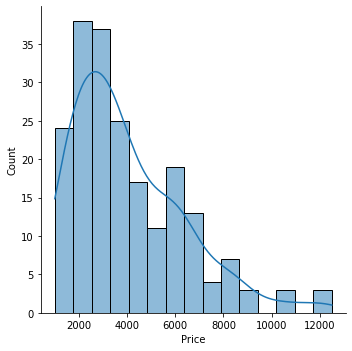

In [9]:
# How are the laptop prices distributed.

g = sns.displot(data = laptops, x = 'list_price', bins = 15, kde = True)

for ax in g.axes.flat:
    ax.set(xlabel = 'Price');

In [10]:
# What are the min, max and mean display sizes?

laptops.display_size.describe()

count    204.000000
mean      14.574804
std        1.109869
min       12.000000
25%       13.300000
50%       14.000000
75%       15.600000
max       18.400000
Name: display_size, dtype: float64

## The min = 12", the max = 18.4" and the mean is 14.574".

In [11]:
# What is the average price for each laptop brand.

brand_prices = laptops.groupby(['brand']).mean()[['list_price']]

brand_prices = brand_prices.reset_index().sort_values('list_price', ascending = False)

brand_prices

,brand,list_price
7,MSI,9071.000000
1,Apple,7082.288158
8,Microsoft,5132.333333
5,Huawei,4040.666667
3,Dell,3872.029412
4,HP,3403.042553
2,Asus,3393.090909
0,Acer,2773.083333
6,Lenovo,2216.391304


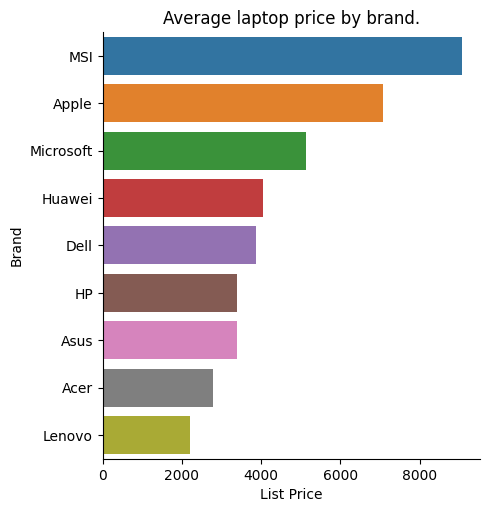

In [12]:
# Plot the results of the groupby method.

g = sns.catplot(data = brand_prices, x = 'list_price', y = 'brand', kind = 'bar')

for ax in g.axes.flat:
    ax.set(title = 'Average laptop price by brand.', 
           ylabel = 'Brand',
           xlabel = 'List Price');

# Section 2

In [13]:
# Clean the data



## What is the average laptop price for each processor brand?

In [14]:
# Examine the number and range of the processor_type column.

laptops.processor_type.value_counts()

 Intel Core i5-8250U        38
 Intel Core i7-8550U        28
 Intel Core i7-8565U        24
 Intel Core i5 Dual Core    19
 Intel Core i5-8265U        17
 Intel Celeron N4000        11
 Intel Core i3-7020U         8
 Intel Core i5 Quad Core     8
 Intel Core i7-7500U         8
 Intel Core i5-7200U         6
 Intel Core i3-6006U         6
 Intel Core i7 6 Core        5
 Intel Core i3-8145U         4
 Intel Core i7 Quad Core     3
 Intel Core i7-7700HQ        2
 Intel Core i7-7820HK        2
 Intel Core i3-8130U         2
 Intel Celeron N3350         2
 Intel Celeron N3060         2
 Intel Core i7-8750H         2
 Intel Core M3               2
 Intel Core i9               1
 Intel Core i7-6700HQ        1
 Intel Core i3-5005U         1
 AMD A9-9425                 1
 Intel Celeron 4205U         1
Name: processor_type, dtype: int64

In [15]:
# Extact the processor vendor from the processor_type column into a new column in the DataFrame.

laptops['processor_brand'] = laptops.apply(lambda x: x.processor_type.split()[0], axis = 1)


In [16]:
# Get the average list_price by processor_brand using the groupby() method.

avgProcessorPrice = laptops.groupby('processor_brand').list_price.mean().reset_index()

avgProcessorPrice.head()

,processor_brand,list_price
0,AMD,1999.000000
1,Intel,4058.398768


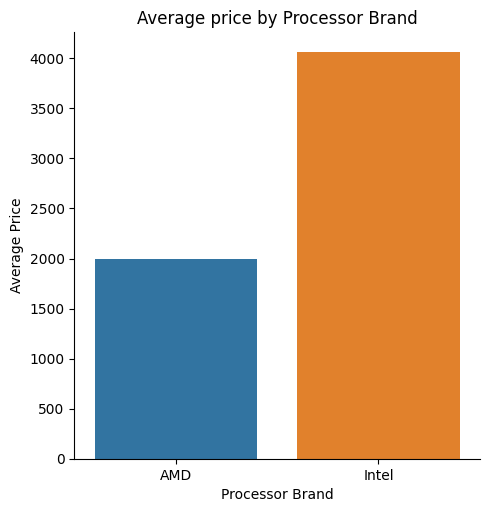

In [17]:
# Plot the data for the average list_price by processor_brand.

g = sns.catplot(data = avgProcessorPrice, x = 'processor_brand', y = 'list_price', kind = 'bar')

for ax in g.axes.flat:
    ax.set(title = 'Average price by Processor Brand',
          xlabel = 'Processor Brand',
          ylabel = 'Average Price');

### The chart above shows the Average laptop price by Processor Brand.

## What are the average ratings for each laptop brand?

In [18]:
# Examine the number and range of the ratings_5max column.

laptops.ratings_5max.value_counts()


0 / 5      132
4.0 / 5     10
4.4 / 5      9
3.9 / 5      9
5.0 / 5      7
4.1 / 5      6
4.2 / 5      5
3.7 / 5      5
3.3 / 5      4
3.8 / 5      4
3.6 / 5      4
4.6 / 5      4
4.3 / 5      2
4.9 / 5      1
4.5 / 5      1
3.0 / 5      1
Name: ratings_5max, dtype: int64

In [19]:
# Extact the actual rating from the ratings_5max column into a new column in the DataFrame.

laptops['rating'] = laptops.apply(lambda x: round(float(x.ratings_5max.split('/')[0]),1), axis = 1)

# laptops.head()[['ratings_5max', 'rating']] # Used to see the results of the split() method.

# Replace the 0.0 values with the numpy NaN value, to allow for the use of the dropna() method.

laptops.rating.replace(0, np.NaN, inplace = True)

# Drop the old ratings_5Max column, as it is no longer needed.

laptops.drop(columns = ['ratings_5max'], inplace = True)

# Show the top 5 rows of the laptops DataFrame

laptops.head()


,brand,laptop_name,display_size,processor_type,graphics_card,disk_space,discount_price,list_price,processor_brand,rating
0,HP,Notebook 14-df0008nx,14.0,Intel Celeron N4000,Intel HD Graphics 600,64 GB (eMMC),1259.0,1259.0,Intel,NaN
1,Lenovo,IdeaPad 330S-14IKB,14.0,Intel Core i5-8250U,Intel UHD Graphics 620,1 TB HDD,1849.0,2099.0,Intel,3.3
2,Huawei,MateBook D Volta,14.0,Intel Core i5-8250U,NVIDIA GeForce MX150 (2 GB),256 GB SSD,2999.0,3799.0,Intel,NaN
3,Dell,Inspiron 15 3567,15.6,Intel Core i3-7020U,Intel HD Graphics 620,1 TB HDD,1849.0,1849.0,Intel,NaN
4,Asus,VivoBook 15 X510UR,15.6,Intel Core i7-8550U,NVIDIA GeForce 930MX (2 GB),1 TB HDD,2499.0,3149.0,Intel,NaN


In [20]:
# Examine the number and range of the rating column.

laptops.rating.value_counts()

4.0    10
4.4     9
3.9     9
5.0     7
4.1     6
4.2     5
3.7     5
3.3     4
3.8     4
3.6     4
4.6     4
4.3     2
4.9     1
4.5     1
3.0     1
Name: rating, dtype: int64

In [21]:
# Get the average rating by brand using the groupby() method.

avgRating = laptops.groupby(['brand']).rating.mean()

avgRating = avgRating.reset_index().sort_values('rating', ascending = False)

avgRating

,brand,rating
1,Apple,4.335000
2,Asus,4.333333
4,HP,4.225000
5,Huawei,4.157143
8,Microsoft,4.100000
3,Dell,3.980000
6,Lenovo,3.830769
0,Acer,3.800000
7,MSI,NaN


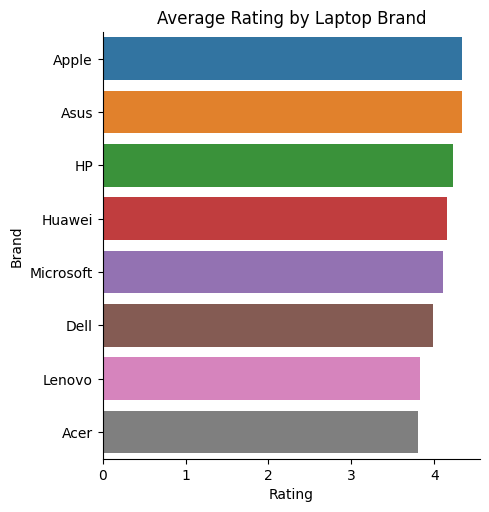

In [22]:
# Plot the data for the average rating by brand.

g = sns.catplot(data = avgRating.query('rating > 0'), x = 'rating', y = 'brand', kind = 'bar', ci = None)

for ax in g.axes.flat:
    ax.set(title = 'Average Rating by Laptop Brand',
          xlabel = 'Rating',
          ylabel = 'Brand');

### The chart above shows the average rating by Laptop Brand.

## What is the average laptop price for each graphics card brand?

In [23]:
# Examine the number and range of the ratings_5max column.

laptops.graphics_card.value_counts()


 NVIDIA GeForce MX150 (2 GB)           25
 Intel UHD Graphics 620                24
 Intel GMA HD                          15
 NVIDIA GeForce MX130 (2 GB)           13
 Intel HD Graphics 620                 12
 Intel UHD Graphics 617                12
 AMD Radeon 530 (2 GB)                  7
 NVIDIA GeForce MX110 (2 GB)            6
 Intel HD Graphics 600                  5
 AMD Radeon 520 (2 GB)                  5
 Intel UHD Graphics 600                 5
 Intel Iris Plus Graphics 645           4
 Intel Iris Plus Graphics 640           4
 Intel Iris Plus Graphics 655           4
 NVIDIA GeForce MX150 (4 GB)            4
 AMD Radeon 530 (4 GB)                  4
 Intel Graphics 620                     4
 NVIDIA GeForce MX250 (4 GB)            3
 Radeon Pro 560X GDDR5 (4 GB)           3
 Radeon Pro 555X GDDR5 (4 GB)           3
 NVIDIA GeForce MX130 (4 GB)            3
 Intel HD Graphics 520                  3
 AMD Radeon R5-M340 (2 GB)              2
 NVIDIA GeForce 940MX (2 GB)      

In [24]:
# Extact the graphics_brand name from the the graphics_card column into a new column in the DataFrame.

laptops['graphics_brand'] = laptops.apply(lambda x: x.graphics_card.split()[0], axis = 1)

laptops.head()

,brand,laptop_name,display_size,processor_type,graphics_card,disk_space,discount_price,list_price,processor_brand,rating,graphics_brand
0,HP,Notebook 14-df0008nx,14.0,Intel Celeron N4000,Intel HD Graphics 600,64 GB (eMMC),1259.0,1259.0,Intel,NaN,Intel
1,Lenovo,IdeaPad 330S-14IKB,14.0,Intel Core i5-8250U,Intel UHD Graphics 620,1 TB HDD,1849.0,2099.0,Intel,3.3,Intel
2,Huawei,MateBook D Volta,14.0,Intel Core i5-8250U,NVIDIA GeForce MX150 (2 GB),256 GB SSD,2999.0,3799.0,Intel,NaN,NVIDIA
3,Dell,Inspiron 15 3567,15.6,Intel Core i3-7020U,Intel HD Graphics 620,1 TB HDD,1849.0,1849.0,Intel,NaN,Intel
4,Asus,VivoBook 15 X510UR,15.6,Intel Core i7-8550U,NVIDIA GeForce 930MX (2 GB),1 TB HDD,2499.0,3149.0,Intel,NaN,NVIDIA


In [25]:
# Get the average list_price by graphics_brand using the groupby() method.

graphics = laptops.groupby(['graphics_brand']).list_price.mean()

graphics = graphics.reset_index().sort_values('list_price', ascending = False)

graphics

,graphics_brand,list_price
3,Radeon,10739.000000
2,NVIDIA,4222.281690
1,Intel,3729.692574
0,AMD,2968.000000


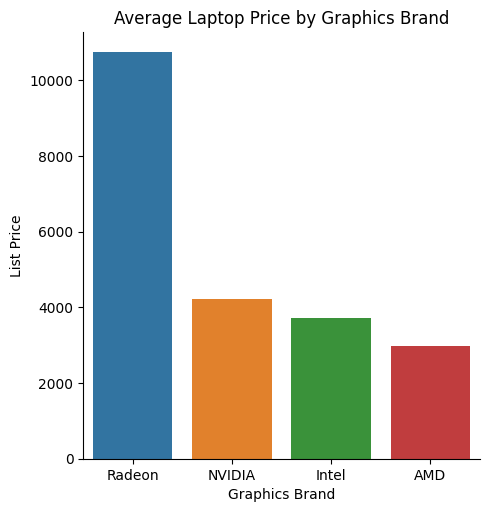

In [26]:
# Plot the data for the average rating by brand.

g = sns.catplot(data = graphics, x = 'graphics_brand', y = 'list_price', kind = 'bar')

for ax in g.axes.flat:
    ax.set(title = 'Average Laptop Price by Graphics Brand',
          ylabel = 'List Price',
          xlabel = 'Graphics Brand');

### The chart above shows the average Laptop Price by Graphics  Brand.

## What percent of laptops have a discount price?

In [27]:
# Determine if a laptop has a discounted price, using a lamda function.

laptops['discounted'] = laptops.apply(lambda x: 1 if x.discount_price != x.list_price else 0, axis = 1)

# Calculate the percent of laptops with a discounted price

percent = laptops.discounted.sum() / laptops.laptop_name.count()

print(f'\nThe precent of laptops with a discounted price is {percent * 100:.2f}%.\n')



The precent of laptops with a discounted price is 49.51%.



### About 50%.

## How is the display size related to price? ~ 13:10 in Video

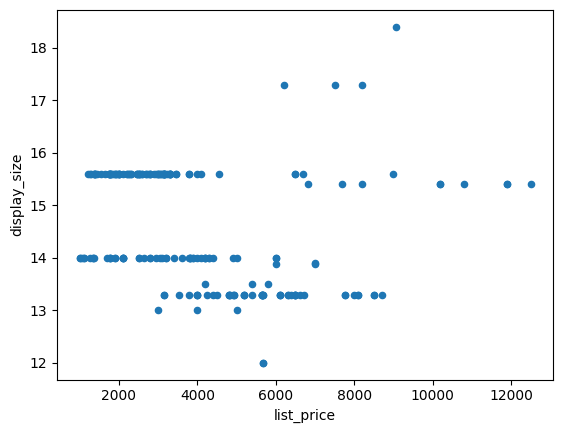

In [28]:
laptops.plot(x = 'list_price', y = 'display_size', kind = 'scatter');

### Based on this scatter plot, it is difficult to see a relationship between Diplay Size and List Price.

## How is the disk space related to price?

In [29]:
# Display a value_count() of the disk_space column.

laptops.disk_space.value_counts()

 1 TB HDD                             59
 256 GB SSD                           21
 512 GB SSD                           15
 128 GB M.2 SSD/1 TB HDD              13
 128 GB SSD/1 TB HDD                  11
 500 GB HDD                            8
 64 GB (eMMC)                          7
 128 GB (PCIe SSD)                     6
 256 GB (PCIe SSD)                     6
 256 GB PCIe NVMe M.2 SSD              6
 2 TB HDD                              6
 512 GB PCIe NVMe M.2 SSD              5
 128 GB SSD                            5
 1 TB PCIe NVMe M.2 SSD                5
 16 GB (Optane)/1 TB HDD               4
 256 GB SSD/1 TB HDD                   4
 512 GB NVMe M.2 SSD                   3
 256 GB NVMe M.2 SSD/1 TB HDD          3
 256 GB M.2 SSD/1 TB HDD               3
 1 TB SSD                              2
 128 GB PCIe NVMe M.2 SSD/1 TB HDD     2
 8 GB (Cache Flash)/1 TB HDD           2
 256 GB (PCIe Flash)                   1
 128 GB M.2 SSD                        1
 128 GB (PCIe Fl

In [30]:
# Define a function to extract a numeric value from the disk_space column.

def isolateDiskSpace(row):
    storageType = row.disk_space.split()[1]
    storageValue = row.disk_space.split()[0]
    spaceGB = 0
    if storageType == 'GB':
        spaceGB = int(storageValue)
    elif storageType == 'TB':
        spaceGB = int(storageValue) * 1000
    return spaceGB


In [43]:
# Create a new column for the disk_space numeric value.

laptops['disk_space_GB'] = laptops.apply(isolateDiskSpace, axis = 1)

# Display the added column and the source column.
laptops[['disk_space_GB', 'disk_space']].head()

,disk_space_GB,disk_space
0,64,64 GB (eMMC)
1,1000,1 TB HDD
2,256,256 GB SSD
3,1000,1 TB HDD
4,1000,1 TB HDD


In [44]:
# Count the resulting disk_space_GB values

laptops.disk_space_GB.value_counts()

1000    66
256     46
128     40
512     24
500      8
64       7
2000     6
16       4
8        2
32       1
Name: disk_space_GB, dtype: int64

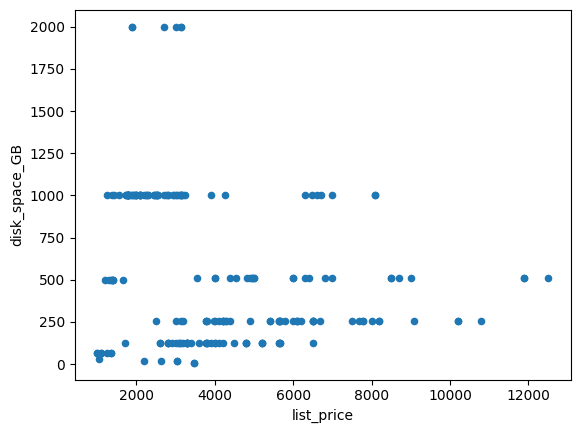

In [46]:
# Create a scatter plot of the list_price vs disk_space_GB columns.

laptops.plot(x = 'list_price', y = 'disk_space_GB', kind = 'scatter');

### Based on this scatter plot, it is difficult to see a relationship between Disk Space (in GB) and List Price.